# THE SPARKS FOUNDATION  
### GRIP JULY 21(Data science and Business analytics)
### Task 1 - Prediction using Supervised Learning
### AUTHOR - ABHINAYA ANBARASAN

**OBJECTIVE**:

**To predict the percentage of a student based on no of hours of study**

### Importing necessary libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


### URL to get dataset: http://bit.ly/w-data

### Reading data 

In [50]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)


### Exploring Data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- **We can infer that there are null columns**

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

- **There are totally 2 columns and 25 records**

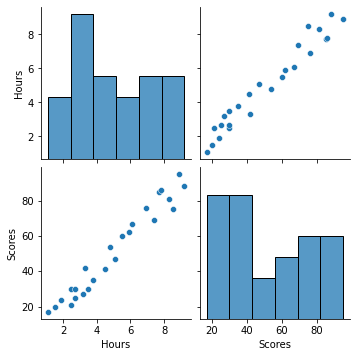

In [8]:
sns.pairplot(df);

### Checking for skewness 

In [9]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

- **Both the columns follow near normal  distribution**

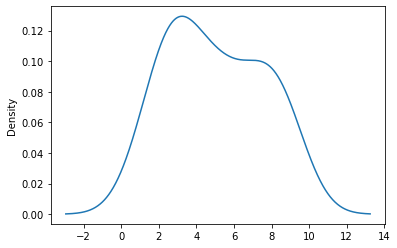

In [10]:
df.Hours.plot(kind = 'kde');

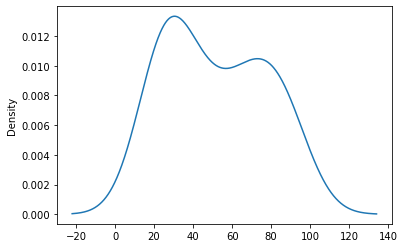

In [11]:
df.Scores.plot(kind = 'kde');

### Correlation Check 

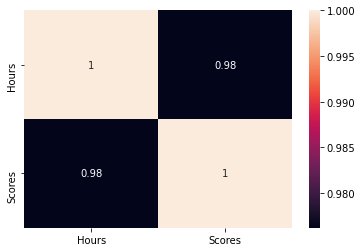

In [12]:
sns.heatmap(df.corr(),annot = True);

- **Scores and Hours have strong positive correlation**

### Plotting Hours against Scores for better understanding

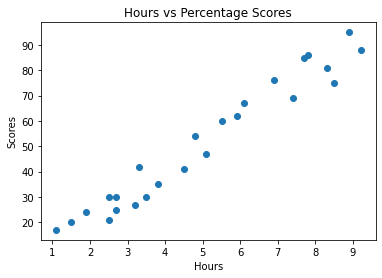

In [13]:
plt.scatter(x = df.Hours, y = df.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Hours vs Percentage Scores");

### Train- Test Split 

In [14]:
x=df.iloc[:,:1]
y=df['Scores']

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state= 51)

In [16]:
X_train.shape

(17, 1)

In [17]:
X_test.shape

(8, 1)

In [18]:
Y_train.shape

(17,)

In [19]:
Y_test.shape

(8,)

### Model Building

In [20]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

### Intercept and Coefficient

In [25]:
print(model.intercept_, model.coef_)

3.370382388693173 [9.61405732]


### Prediction and Accuracy 

In [22]:
model.score(X_test,Y_test)

0.9361670674106156

- **Model accuracy score turns out to be 93.61%**

In [24]:
Y_pred = model.predict(X_test)
Y_pred

array([56.24769763, 77.39862373, 69.70737788, 83.16705812, 29.32833714,
       52.40207471, 74.51440654, 34.1353658 ])

### Comparing predicted and actual values 

In [40]:
pd.DataFrame({'Predicted' : Y_pred,'Actual' : Y_test,'Error': Y_test - Y_pred}).reset_index(drop = True)

,Predicted,Actual,Error
0,56.247698,60,3.752302
1,77.398624,85,7.601376
2,69.707378,76,6.292622
3,83.167058,81,-2.167058
4,29.328337,30,0.671663
5,52.402075,47,-5.402075
6,74.514407,69,-5.514407
7,34.135366,27,-7.135366


### Visualising Best Fit line

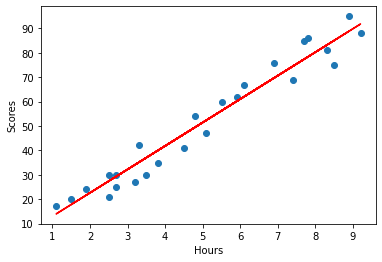

In [41]:
plt.scatter(x,y)
plt.xlabel("Hours")
plt.ylabel("Scores")
bestfit_line = model.coef_*x+model.intercept_
plt.plot(x,bestfit_line,'r');

### Evaluating Model 

In [46]:
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print("R-Squared:", metrics.r2_score(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('MAE:', metrics.mean_absolute_error(Y_test, Y_pred))

MSE: 28.388699379556982
R-Squared: 0.9361670674106156
RMSE: 5.328104670476828
MAE: 4.817108597564743


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [49]:
Required_score = model.predict([[9.25]])
print("Required_score:",Required_score)

Required_score: [92.30041257]


### Conclusion 

- **Scores and Hours spent studying have a strong positive correlation**
- **Model explains 93.61% of variation in dependent variable**
- **A student who studies for 9.25 hours is predicted to score around 92.3**